# AIM
To apply averge and median filtre on the given test images.
B030  
Preet Jha  
B1  
IVP Lab 3  
Date: 4 Aug 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from scipy import signal
from skimage.color import rgb2gray
from random import seed
from random import randint

In [2]:
image = io.imread("baboon.png")
sh = image.shape
mu,sigma=0,20
rows = sh[0]
cols = sh[1]
gn = np.random.normal(mu,sigma,(rows,cols))

In [3]:
gn.shape

(512, 512)

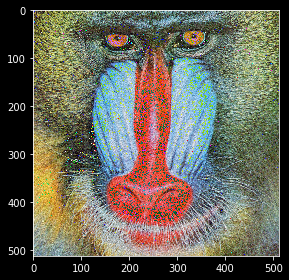

In [4]:
image_gn = image.copy()
image_gn[:,:,0]=image_gn[:,:,0]+gn
image_gn[:, :, 1] = image_gn[:, :, 1]+gn
image_gn[:, :, 2] = image_gn[:, :, 2]+gn
io.imshow(image_gn)

In [5]:
sz = 6
avg_filter=np.ones((sz,sz))
avg_filter=avg_filter/(sz*sz)

In [6]:
filtered_image=image_gn.copy()
filtered_image[:,:,0] = signal.convolve2d(image_gn[:,:,0], avg_filter, mode="same")
filtered_image[:,:,1] = signal.convolve2d(image_gn[:,:,1], avg_filter, mode="same")
filtered_image[:,:,2] = signal.convolve2d(image_gn[:,:,2], avg_filter, mode="same")

Text(0.5, 1.0, 'Filtred')

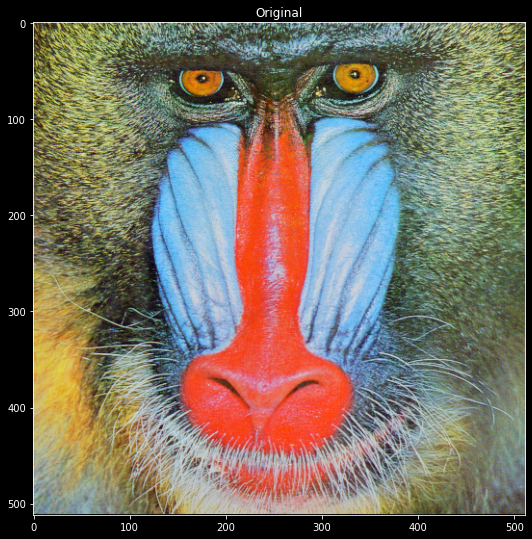

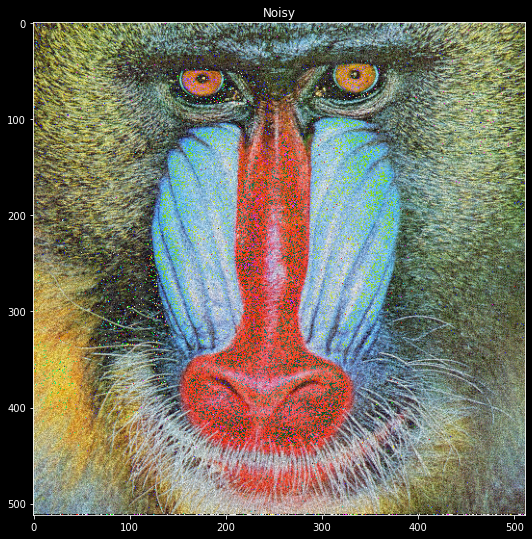

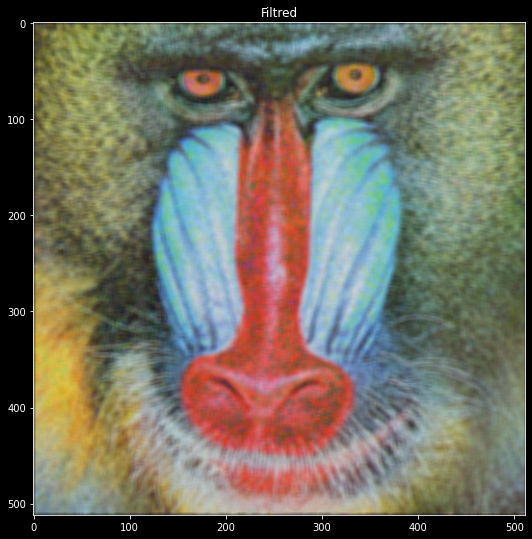

In [7]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original")


plt.figure(figsize=(30, 30))
plt.subplot(1, 3, 2)
plt.imshow(image_gn)
plt.title("Noisy")


plt.figure(figsize=(30, 30))
plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title("Filtred")



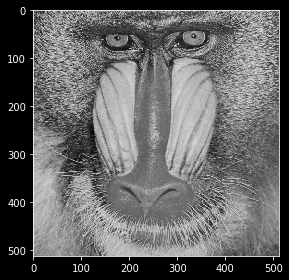

In [8]:
image_ori=image.copy()
image_ori=rgb2gray(image_ori)
io.imshow(image_ori)

In [9]:
image_spnoise=image_ori.copy()
p=0.5 #10% of the total number of pixels
pixels_sp=(rows*cols)*p
sp=1

In [10]:
for i in range(int(pixels_sp)):
    temp1=randint(0,rows-1)
    temp2=randint(0,cols-1)
    image_spnoise[temp1][temp2]= sp
    if sp == 1:
        sp=0
    else:
        sp=1



In [11]:
filtred_imagesp = image_spnoise.copy()
sz = 13
center = int(((sz-1)/2))
med = int(((sz*sz)-1)/2)
for r in range(rows-sz):
    for c in range(cols-sz):
        temp1 = image_spnoise[r:r+sz, c:c+sz]
        temp2 = np.reshape(temp1, (1, (sz*sz)))  # Check
        temp3 = np.sort(temp2)
        filtred_imagesp[r+center, c+center] = temp3[0][med]


Text(0.5, 1.0, 'Median Filter')

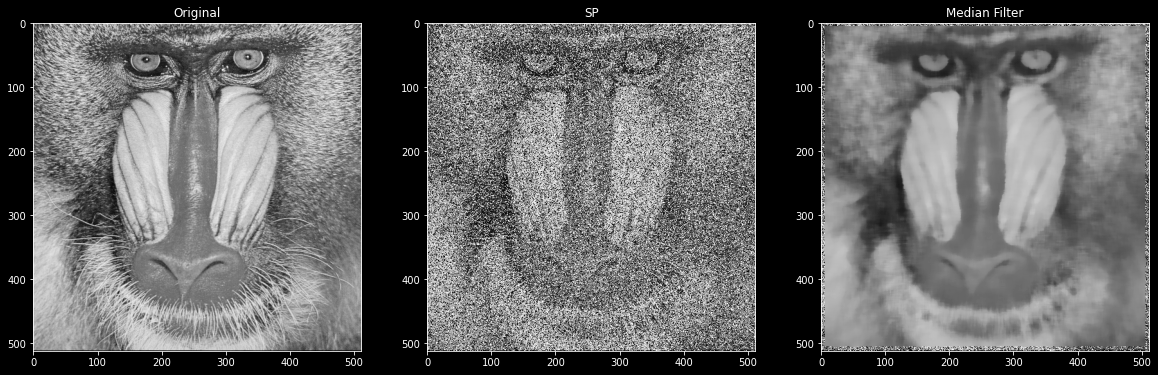

In [12]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(image_ori, cmap="gray")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(image_spnoise, cmap="gray")
plt.title("SP")
plt.subplot(1, 3, 3)
plt.imshow(filtred_imagesp, cmap="gray")
plt.title("Median Filter")


# Conclusion
- Average filter of size 3*3 is applied to the given noisy test image.
- It is observed that the given size is not effective in reducing the noise. 
- If average filter ofzie 15x15 is applied on the noisy image, filtered image is much better than the filter of size 3x3.
- However, the filtered image is quite blurry.  
  
- 10% of the pixels of the givven image are added with salt and pepper noise.
- After applying median filter, most of the noise Disappears.
- If 40% of the pixels are converted to salt and pepper noise then, median filter of size 13 x 13 is required to remove the noise.